In [ ]:
# https://www.youtube.com/watch?v=PaCmpygFfXo

# Learning to make Makemore by Andrej Karpathy!
# Makemore is a Character Level Language Model
# Treats every input as a sequence of individual characters
# predict next character in the sequence
# Using Neural Network approach now with training set splitting

In [1]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
import torch

In [7]:
N = torch.zeros((27, 27), dtype=torch.int32) # counts of letters and start and end characters

In [9]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [21]:
# Create the training set of bigrams (x, y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.'] # accounting for start and end characters
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs) # infers datatype, torch.Tensor(xs) creates floats
ys = torch.tensor(ys)


In [17]:
xs

tensor([ 0,  5, 13, 13,  1])

In [19]:
ys

tensor([ 5, 13, 13,  1,  0])

In [31]:
# one-hot encoding
# turns the 13 into a vector with all 0s besides the 13th index being a 1
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

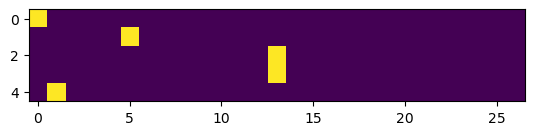

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(xenc)

In [52]:
W = torch.randn((27, 27)) 
# fills the tensor with random numbers based on normal distribution

(xenc @ W) # matrix multiplication: (5, 27) x (27, 27)

tensor([[ 2.0679,  0.1867, -0.6524,  1.0157, -1.1255, -0.2826,  0.2065, -1.5118,
          1.6391,  0.5119,  0.6136,  0.8731, -0.1425,  1.1610,  0.3290,  0.1127,
          0.5425,  1.0464,  0.1613,  1.4677, -1.8029,  1.1601, -0.5343,  0.3071,
          1.1355,  0.8755, -2.4943],
        [-0.7809, -0.0359, -3.0685,  0.4164,  0.2315, -0.4644, -0.9839,  0.0091,
         -0.9283, -0.4792, -0.9274, -0.4708,  1.7571,  0.5549, -0.2523,  0.8310,
          0.2802,  0.5157, -0.8587, -1.0831, -0.3344, -0.1858, -1.5041,  0.4876,
         -0.0537,  0.7809, -1.5634],
        [ 0.8052,  0.6972, -0.7605,  1.3057,  1.5494, -1.0209,  0.4867,  2.4423,
         -0.4113, -0.0797, -0.8247,  0.4833, -1.5567,  0.3247, -0.3154, -0.3230,
          0.3733,  0.8861, -0.6105,  0.6191, -0.0485,  1.0038,  0.0443, -0.7961,
         -0.3803,  0.3231,  1.2685],
        [ 0.8052,  0.6972, -0.7605,  1.3057,  1.5494, -1.0209,  0.4867,  2.4423,
         -0.4113, -0.0797, -0.8247,  0.4833, -1.5567,  0.3247, -0.3154, -0.3230

In [64]:
logits = xenc @ W # log counts
counts = logits.exp() # everything negative is lower than 1
probs = counts / counts.sum(1, keepdim=True) # normalize counts
probs

tensor([[0.1477, 0.0225, 0.0097, 0.0516, 0.0061, 0.0141, 0.0230, 0.0041, 0.0962,
         0.0312, 0.0345, 0.0447, 0.0162, 0.0597, 0.0260, 0.0209, 0.0321, 0.0532,
         0.0220, 0.0811, 0.0031, 0.0596, 0.0109, 0.0254, 0.0581, 0.0448, 0.0015],
        [0.0156, 0.0328, 0.0016, 0.0516, 0.0429, 0.0214, 0.0127, 0.0343, 0.0134,
         0.0211, 0.0135, 0.0212, 0.1971, 0.0592, 0.0264, 0.0781, 0.0450, 0.0570,
         0.0144, 0.0115, 0.0243, 0.0282, 0.0076, 0.0554, 0.0322, 0.0743, 0.0071],
        [0.0444, 0.0399, 0.0093, 0.0733, 0.0935, 0.0072, 0.0323, 0.2283, 0.0132,
         0.0183, 0.0087, 0.0322, 0.0042, 0.0275, 0.0145, 0.0144, 0.0288, 0.0482,
         0.0108, 0.0369, 0.0189, 0.0542, 0.0208, 0.0090, 0.0136, 0.0274, 0.0706],
        [0.0444, 0.0399, 0.0093, 0.0733, 0.0935, 0.0072, 0.0323, 0.2283, 0.0132,
         0.0183, 0.0087, 0.0322, 0.0042, 0.0275, 0.0145, 0.0144, 0.0288, 0.0482,
         0.0108, 0.0369, 0.0189, 0.0542, 0.0208, 0.0090, 0.0136, 0.0274, 0.0706],
        [0.0471, 0.0148,

In [66]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index
    y = ys[i].item() # label character index
    print('--------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next character):', y)
    p = probs[i, y]
    print('probability assigned by the net to the the correct character:', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.1477, 0.0225, 0.0097, 0.0516, 0.0061, 0.0141, 0.0230, 0.0041, 0.0962,
        0.0312, 0.0345, 0.0447, 0.0162, 0.0597, 0.0260, 0.0209, 0.0321, 0.0532,
        0.0220, 0.0811, 0.0031, 0.0596, 0.0109, 0.0254, 0.0581, 0.0448, 0.0015])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01408227439969778
log likelihood: -4.262838363647461
negative log likelihood: 4.262838363647461
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0156, 0.0328, 0.0016, 0.0516, 0.0429, 0.0214, 0.0127, 0.0343, 0.0134,
        0.0211, 0.0135, 0.0212, 0.1971, 0.0592, 0.0264, 0.0781, 0.0450, 0.0570,
        0.0144, 0.0115, 0.0243, 0.0282, 0.0076, 0.0554, 0.0322, 0.0743, 0.0071])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.

In [ ]:
# Optimization step

In [80]:
# Generate random 27 neuron weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad = True)

In [131]:
# Create dataset
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad = True)

number of examples:  228146


In [141]:
# gradient descent
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdims=True)
    
    # Calculate loss with average negative log likelihood (nll)
    # regularization loss to try to make all W's be close to 0 as well
    # increasing the regularization coefficient basically is same as increasing count in smoothing
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # setting gradients to None is more efficient than zero_grad
    
    loss.backward()

    #update
    W.data += -50 * W.grad

2.4818339347839355
2.481825828552246
2.4818174839019775
2.481809139251709
2.4818010330200195
2.481793165206909
2.481785297393799
2.4817774295806885
2.481769323348999
2.481761932373047
2.4817538261413574
2.481745958328247
2.481738328933716
2.4817306995391846
2.4817235469818115
2.4817161560058594
2.481708526611328
2.481701135635376
2.481694221496582
2.48168683052063
2.481680154800415
2.481672763824463
2.48166561126709
2.481658697128296
2.481651782989502
2.481644868850708
2.481637954711914
2.481631278991699
2.4816248416900635
2.4816179275512695
2.4816112518310547
2.48160457611084
2.4815986156463623
2.4815919399261475
2.4815855026245117
2.481579303741455
2.4815726280212402
2.4815664291381836
2.481560468673706
2.4815540313720703
2.4815480709075928
2.481541872024536
2.4815359115600586
2.481529712677002
2.4815237522125244
2.4815175533294678
2.4815120697021484
2.481506109237671
2.4815003871917725
2.481494426727295
2.4814889430999756
2.481482982635498
2.481477737426758
2.4814717769622803
2.4814

In [143]:
# sample from the "neural net" model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:

        # Before: p = P[x]
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cfay.
a.
